# Проект 01 – NumPy 

In [25]:
import time
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

## Сравнение скорости Python и NumPy

Библиотека NumPy, благодаря использованию векторных операций, внутренней оптимизации на уровне C и эффективного 
кэширования, значительно ускоряет вычисления с большими массивами чисел по сравнению с обычным Python.

В этом задании тебе предстоит на практике сравнить скорость выполнения операций в чистом Python и с использованием NumPy.

#### Декораторы
**Декораторы** — это специальный механизм в Python, который позволяет дополнять поведение функции без изменения её кода.
Они «оборачивают» функцию в другую, добавляя нужный функционал — например, логирование, проверку прав, кэширование или измерение времени выполнения.

Синтаксически декоратор — это просто функция, которая принимает другую функцию и возвращает новую, изменённую.
Обычно декораторы применяются с помощью символа @ над определением функции, например:
```python
@decorator_name
def my_function():
    ...
```
В этом задании мы хотим **сравнить время выполнения функций**, реализованных на чистом Python и с использованием NumPy. 
Конечно, можно было бы вставить код замера времени прямо внутрь каждой функции, но в этом случае код стал бы громоздким 
и повторяющимся, а логика замера времени — смешалась бы с основной задачей.

Чтобы сделать код **более аккуратным, читаемым и удобным для повторного использования**, мы воспользуемся **декоратором**.  


#### Задание 1.1. Замер скорости
1. Реализуй декоратор `@benchmark`, который:
    * принимает функцию,
    * измеряет время её выполнения,
    * выводит результат в **секундах**.  
2. Протестируй работу декоратора на функции `python_mean`, которая вычисляет **среднее арифметическое** элементов списка на чистом Python.
3. В качестве теста передай в функцию список из **1 000 000 элементов**.

In [2]:
def benchmark(func):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed_sec = end - start
        print(f"Время выполнения функции '{func.__name__}': {elapsed_sec:.6f} сек")
        return result
    return wrapper

In [3]:
@benchmark
def python_mean(array):
    return sum(array) / len(array)

In [4]:
data = list(range(1_000_000))
mean_value = python_mean(data)
print(f"Среднее значение: {mean_value:.2f}")

Время выполнения функции 'python_mean': 0.005491 сек
Среднее значение: 499999.50


### Задание 1.2. Базовые функции
1. Реализуй следующие функции:
    - **Функция 1:** вычисление среднего арифметического элементов массива.
    - **Функция 2:** создание квадратной матрицы **n × n**, заполненной случайными числами.
    - **Функция 3:** проверка, есть ли в матрице **нулевые столбцы** (столбцы, где все элементы равны нулю).
    - **Функция 4:** вычисление **суммы элементов на главной диагонали** матрицы. 
2. Для каждой функции создай **два варианта реализации**:
    - на **чистом Python**,
    - с использованием **NumPy**.
3. Покажи, что **обе версии дают одинаковый результат** на одинаковых входных данных

In [5]:
@benchmark
def numpy_mean(arr):
    return np.mean(arr)

@benchmark
def python_mean(arr):
    return sum(arr) / len(arr)

In [6]:
@benchmark
def numpy_create_matrix(n):
    return np.random.rand(n, n)

@benchmark
def python_create_matrix(n):
    return [[random.random() for _ in range(n)] for _ in range(n)]

In [7]:
@benchmark
def numpy_has_zero_columns(matrix):
    return np.any(np.all(matrix == 0, axis=0))

@benchmark
def python_has_zero_columns(matrix):
    if not matrix or not matrix[0]:
        return False
    
    n_cols = len(matrix[0])
    n_rows = len(matrix)
    
    for j in range(n_cols):
        all_zero = True
        for i in range(n_rows):
            if matrix[i][j] != 0:
                all_zero = False
    if all_zero:
        return True
    return False

In [8]:
@benchmark
def numpy_diagonal_sum(matrix):
    return np.trace(matrix)

@benchmark
def python_diagonal_sum(matrix):
    total = 0
    n = min(len(matrix), len(matrix[0])) if matrix else 0
    for i in range(n):
        total += matrix[i][i]
    return total

### Задание 1.3. Сравнение производительности Python и NumPy

Теперь, когда у тебя есть реализации функций и декоратор для измерения времени, сравни производительность Python и NumPy на практике:
1. Для каждой пары функций (Python / NumPy) измерь время выполнения с помощью декоратора `@benchmark`.
2. Выведи результаты в удобном виде (например, в виде таблицы или форматированного текста).
3. Сделай вывод о различиях в скорости работы и объясни, за счёт чего NumPy работает быстрее.

**Выводы:**

1. TODO
2. TODO

## Головоломка Судоку

После заданий первого проекта, где ты вспомнил базовый синтаксис Python, перейдем к изучению библиотеки **NumPy**.

**NumPy** — это мощный инструмент для работы с массивами и матрицами, который широко используется в анализе данных и 
научных вычислениях. Чтобы почувствовать себя увереннее при работе с матрицами, мы попробуем реализовать 
**решатель головоломок Судоку**.

В этом проекте ты научишься:
* работать с матрицами и массивами с помощью NumPy,
* практиковаться в использовании базовых алгоритмов и циклов,
* писать программу, которая решает головоломку Судоку,
* писать **тесты для проверки корректности решения**, чтобы убедиться, что солвер работает правильно.


### Задание 2.1. Запрос по API
* Изучи API [YouDoSudoku](https://www.youdosudoku.com/) и разберись, как получать игры судоку и их решения.
* Напиши функцию `get_sudoku(level)`, которая принимает уровень сложности (`'easy'`, `'medium'`, `'hard'`).
* Функция должна возвращать две матрицы `numpy` размером 9×9: одну — с головоломкой, другую — с полным решением.
* После запроса выведи обе матрицы, чтобы убедиться, что данные получены и преобразованы правильно.

### Задание 2.2. Написание тестов
* Используя библиотеку `ipytest`, напиши тесты, которые проверяют корректность работы решения Судоку.
* Каждый тест должен содержать [docstring](https://peps.python.org/pep-0257/), в котором кратко описано, какое правило Судоку он проверяет.
* Один тест должен проверять одно правило Судоку.

### Задание 2.3. Реализация алгоритма решения
* Напиши алгоритм решения Судоку. Можно использовать **brute-force (backtracking)**. Алгоритм должен заполнять все пустые клетки числами от 1 до 9, соблюдая правила Судоку для строк, столбцов и 3×3 блоков.
* Проверь работу алгоритма с помощью ранее написанных тестов и убедись, что они покрывают все крайние случаи.
* Получи через [YouDoSudoku API](https://www.youdosudoku.com/) по 5 примеров Судоку разной сложности, реши их своим алгоритмом и выведи на экран как исходные поля, так и решения. Проверь, что решения корректны.

## Сингулярное разложение (SVD)

В библиотеке NumPy реализовано множество полезных математических функций: операции с массивами, линейная алгебра, вычисление статистических показателей, тригонометрические и экспоненциальные функции, преобразования Фурье, решение систем уравнений, а также **сингулярное разложение матриц**.

Любую матрицу (A) можно разложить следующим образом:

$$A = U \times S \times V^T$$

Где:
* $U$ — матрица **левых сингулярных векторов**
* $S$ — **диагональная матрица сингулярных чисел**
* $V^T$ — матрица **правых сингулярных векторов** (транспонированная)

Это разложение называется **Сингулярное разложение** и оно широко используется в **анализе данных** и **машинном обучении**:

* **Сжатие изображений** и сигналов;
* **Рекомендательные системы** (например, в коллаборативной фильтрации);
* **Выделение основных компонентов** (PCA);
* **Аппроксимация матриц** и уменьшение размерности;
* В задачах **анализ текста** (Latent Semantic Analysis).

Матрица $S$ содержит **сингулярные числа**, которые несут основную информацию о матрице (например, изображении).

Если сохранить только **k наибольших сингулярных чисел**, мы можем получить приближенную матрицу:

$$A_k = U[:, :k] \times S[:k, :k] \times V^T[:k, :]$$

* Это позволяет **сжимать изображения**, сохраняя ключевую информацию и убирая шум.
* Чем меньше (k), тем сильнее сжатие, но при этом может теряться часть деталей.

В этом проекте мы воспользуемся SVD для сжатия изображений, чтобы на практике увидеть, как сохраняются важные признаки картинки при уменьшении её размерности.

### Задание 3.1. Подготовка изображения и SVD-разложение
1. С помощью библиотеки `Pillow` загрузите изображение [jackal.png](misc/jackal.png).
<center><img src="misc/jackal.png" alt="jackal" width="200" height="200"></center>

2. Преобразуйте изображение в `np.array`.
3. Примените **SVD-разложение** к массиву с помощью `np.linalg.svd`
4. Выведи размерность изображения и матриц $U$, $S$, $V$


In [18]:
img = Image.open("../../AI_Data_Analytics.Project_2.ID_1577600/misc/jackal.png").convert('L')
img_array = np.array(img)

In [19]:
U, S, V = np.linalg.svd(img_array)

In [20]:
img_array.shape

(854, 803)

In [21]:
U.shape

(854, 854)

In [22]:
S.shape

(803,)

In [23]:
V.shape

(803, 803)

### Задание 3.2. Сжатие изображения и визуализация результатов
1. Определи набор значений (k) — количество сингулярных чисел для сохранения. Рекомендуемые значения: [100, 50, 25, 20, 10].
2. Для каждого (k) создай **приближенную версию изображения**:
   $$A_k = U[:, :k] \times S[:k, :k] \times V^T[:k, :]$$
3. Визуализируй результаты:
   * Размести **оригинальное изображение** в первом subplot'е.
   * Размести все сжатые версии в остальных subplot'ах.
   * Добавь **заголовки**, указывающие значение (k).

<center><img src="../misc/jackals.png" alt="jackal" width="400" height="300"></center>

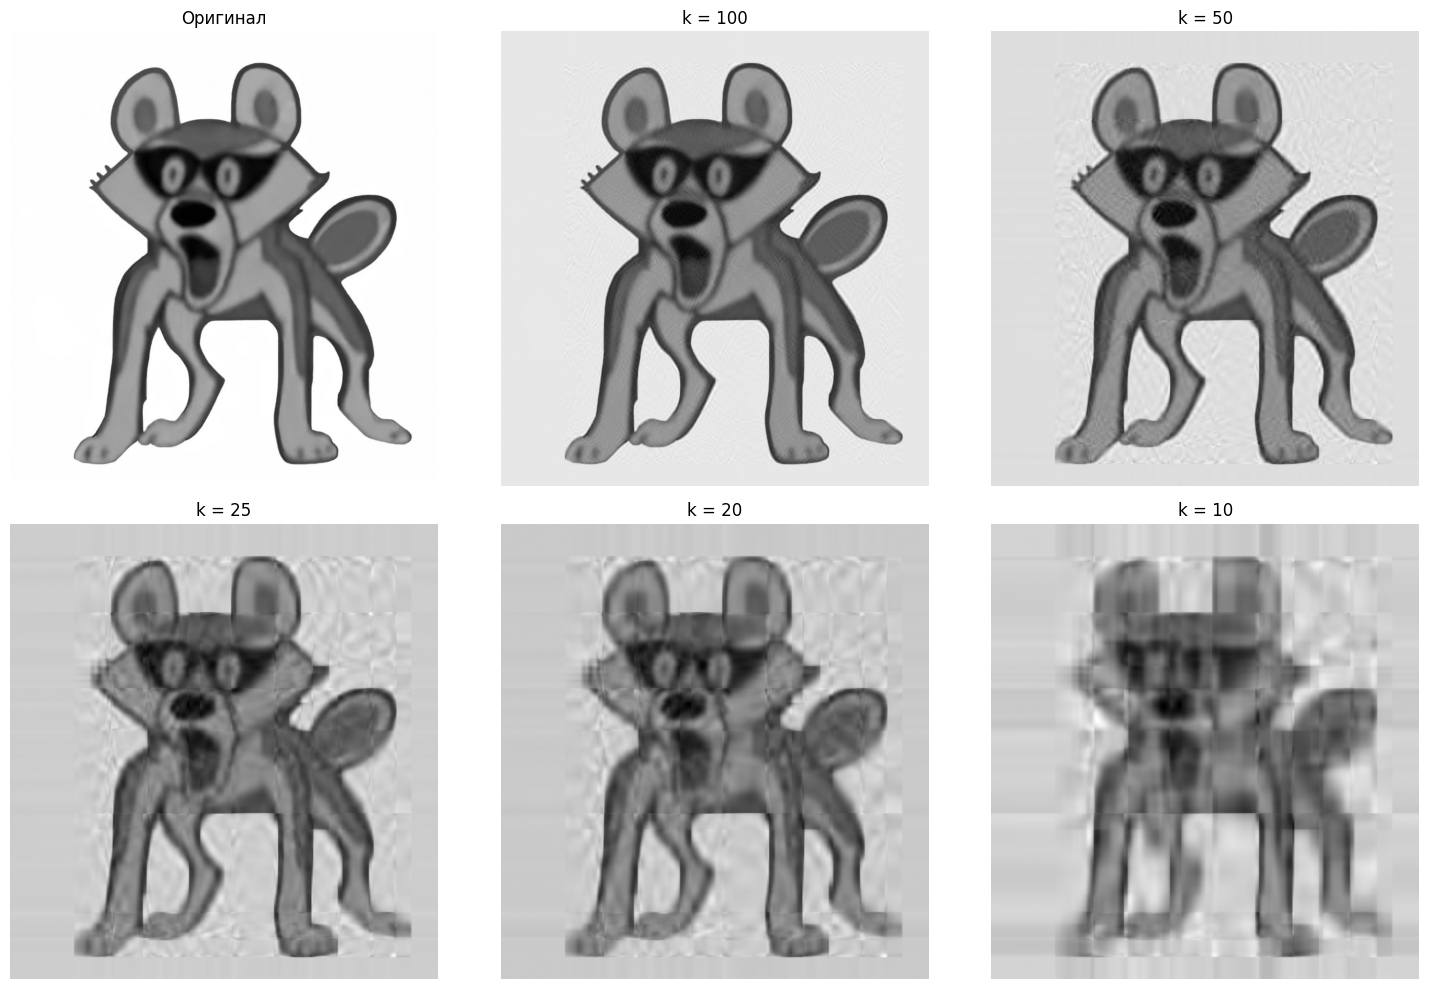

In [26]:
ks = [100, 50, 25, 20, 10]
n = len(ks) + 1
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axes[0, 0].imshow(img_array, cmap='gray')
axes[0, 0].set_title('Оригинал')
axes[0, 0].axis('off')

for i, k in enumerate(ks):
    row = (i + 1) // 3
    col = (i + 1) % 3
    compressed = U[:, :k] @ np.diag(S[:k]) @ V[:k, :]
    axes[row, col].imshow(compressed, cmap='gray')
    axes[row, col].set_title(f'k = {k}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()